 <center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></centre>

##### Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. 

**Current Scenario**

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

**By adding 1.5 to the number of rings, we get the abalone’s age in years.**

### Project Deliverables

   - Deliverable: Predict the number of rings for each abalone.
   - Machine Learning Task: Regression
   - Target Variable: Rings
**Evaluation Metric**
    - The model evaluation will be based on the RMSE score.

### ABALONE AGE PREDICTION

#### Table of contents

### Dataset description

|Column Name||Description|
|-----------||-----------|
|**ID**||Unique Id of the sample|
|**Sex**||The sex of the abalone (M, F, and I (infant))|
|**Length**||Longest shell measurement (mm)|
|**Diameter**||Diameter of abalone perpendicular to length (mm)|
|**Height**||Height of abalone with meat in the shell (mm)|
|**Whole_weight**||Weight of the whole abalone (grams)|
|**Shucked_weight**||Weight of the meat of abalone (grams)|
|**Viscera_weight**||Gut weight (after bleeding) of the abalone (grams)|
|**Shell_weight**||Weight of the abalone after being dried (grams)|
|**Rings**||Number of Rings in the abalone|

In [1]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\intel\appdata\roaming\python\python38\site-packages (3.0.0)


In [2]:
import numpy as np                 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics 

In [3]:
df_train=pd.read_csv('https://raw.githubusercontent.com/smithaprakash91/ABALONE-AGE-PREDICTION/main/abalone_train.csv')
df_train

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14
...,...,...,...,...,...,...,...,...,...,...
3336,1033,M,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10
3337,3264,F,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12
3338,1653,M,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10
3339,2607,F,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9


**The column Rings is also present in the dataset which is a measure of the age of the abalone. By adding 1.5 to the number of rings, we get the abalone’s age in years**

In [4]:
df_train['Age'] = df_train['Rings'] + 1.5

In [5]:
df_train.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,6.5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,4.5
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,16.5
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,11.5
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,15.5


In [6]:
df_test=pd.read_csv('https://raw.githubusercontent.com/smithaprakash91/ABALONE-AGE-PREDICTION/main/abalone_test.csv')
df_test

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1,1580,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
2,3784,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
3,463,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
4,2615,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775
...,...,...,...,...,...,...,...,...,...
831,575,F,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.3500
832,3231,M,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.1250
833,1084,I,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.1170
834,290,M,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.3250


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
 10  Age             3341 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 287.2+ KB


In [8]:
df_train['Sex'].value_counts()

M    1232
F    1058
I    1051
Name: Sex, dtype: int64

In [9]:
df_train['Sex'].replace(['M', 'F', 'I'], [0, 1, 2], inplace = True)
df_train

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,3141,2,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,6.5
1,3521,2,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,4.5
2,883,0,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,16.5
3,3627,0,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,11.5
4,2106,0,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,15.5
...,...,...,...,...,...,...,...,...,...,...,...
3336,1033,0,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10,11.5
3337,3264,1,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12,13.5
3338,1653,0,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10,11.5
3339,2607,1,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9,10.5


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   int64  
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
 10  Age             3341 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 287.2 KB


In [11]:
df_train.isnull().sum()

Id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Age               0
dtype: int64

In [12]:
df_train.describe()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2085.442083,0.945825,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396,11.458396
std,1197.721846,0.824983,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591,3.205591
min,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,1055.000000,0.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000,9.500000
50%,2086.000000,1.000000,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000,11.500000
75%,3114.000000,2.000000,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000,12.500000
max,4175.000000,2.000000,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000,28.500000


### Exploratory Data Analysis

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   int64  
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
 10  Age             3341 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 287.2 KB


**There are no missing values**

In [14]:
df_train=df_train.drop_duplicates()
df_train.reset_index()

,index,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,0,3141,2,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,6.5
1,1,3521,2,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,4.5
2,2,883,0,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,16.5
3,3,3627,0,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,11.5
4,4,2106,0,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3336,3336,1033,0,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770,10,11.5
3337,3337,3264,1,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12,13.5
3338,3338,1653,0,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535,10,11.5
3339,3339,2607,1,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185,9,10.5


#### Numerical data distribution

Text(0, 0.5, 'Count')

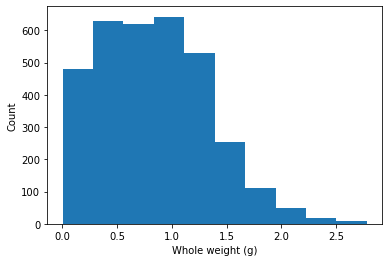

In [19]:
plt.hist(df_train['Whole_weight'])
plt.xlabel("Whole weight (g)")
plt.ylabel("Count")

In [20]:
import random
r = lambda: random.randint(0,255)
print('#%02X%02X%02X' % (r(),r(),r()))

#1940B3


In [21]:
import random
color = "%06x" % random.randint(0, 0xFFFFFF)

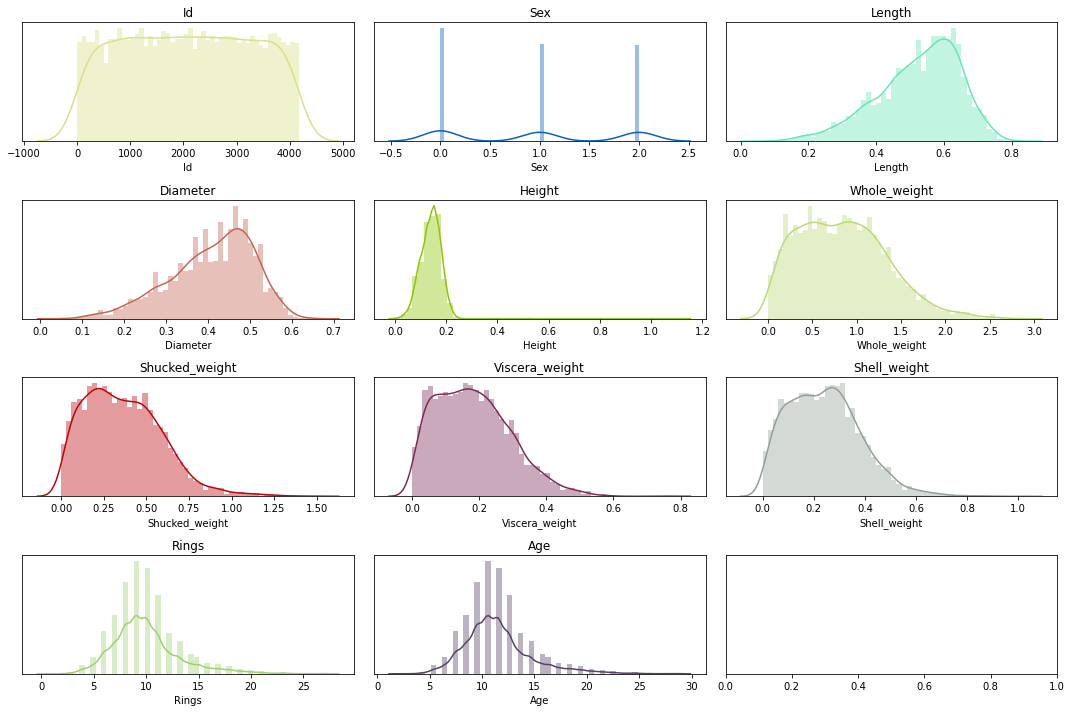

In [22]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, sharex = False, figsize=(15, 10))
colors = []
for i in range(11):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))
columns = ['Id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight','Shell_weight','Rings','Age']
        
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = df_train[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

#### Observations:-
**Positive skewed (mean > median)**
- Shucked_weight
- Whole_weight

**Negative skewed (mean < median)**
- Rings
- Viscera_weight
- Height
- Diameter
- Length
- Sex

**Question 1:What's the gender distribution of the abalone?**

In [24]:
df_train['Sex'].nunique()

3

In [25]:
df_train['Sex'].value_counts()

0    1232
1    1058
2    1051
Name: Sex, dtype: int64

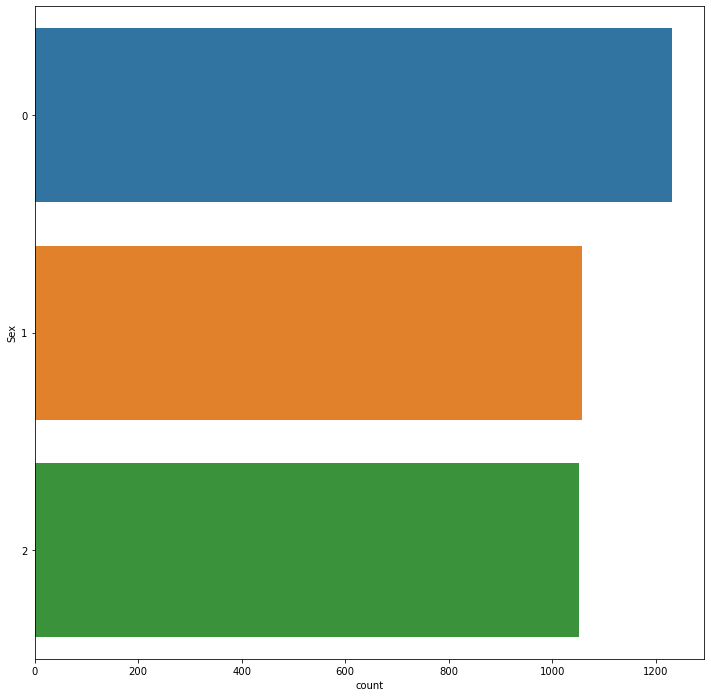

In [30]:
plt.figure(figsize=(12,12))
sns.countplot(y='Sex',data=df_train,order=df_train['Sex'].value_counts().index)

**Question 2: What's the minimum and maximum age of the abalone?**

In [31]:
df_train['Age'].nunique()

27

In [33]:
df_train['Age'].max()

28.5

In [34]:
df_train['Age'].min()

2.5

**Checking Covariance between the variables**

In [36]:
df_train.cov()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
Id,1.434538e+06,43.525454,12.370774,8.692238,2.015762,37.280594,23.962477,8.570389,6.090638,-360.291183,-360.291183
Sex,4.352545e+01,0.680597,-0.044696,-0.037538,-0.014557,-0.188214,-0.081529,-0.041391,-0.051545,-0.936386,-0.936386
Length,1.237077e+01,-0.044696,0.014342,0.011685,0.004132,0.054717,0.024109,0.011929,0.015015,0.211883,0.211883
Diameter,8.692238e+00,-0.037538,0.011685,0.009780,0.003436,0.045159,0.019790,0.009809,0.012500,0.180576,0.180576
Height,2.015762e+00,-0.014557,0.004132,0.003436,0.001817,0.016892,0.007280,0.003676,0.004764,0.072905,0.072905
Whole_weight,3.728059e+01,-0.188214,0.054717,0.045159,0.016892,0.243827,0.107310,0.052675,0.065817,0.847397,0.847397
Shucked_weight,2.396248e+01,-0.081529,0.024109,0.019790,0.007280,0.107310,0.050246,0.023084,0.027574,0.297735,0.297735
Viscera_weight,8.570389e+00,-0.041391,0.011929,0.009809,0.003676,0.052675,0.023084,0.012197,0.013971,0.175773,0.175773
Shell_weight,6.090638e+00,-0.051545,0.015015,0.012500,0.004764,0.065817,0.027574,0.013971,0.019552,0.280214,0.280214
Rings,-3.602912e+02,-0.936386,0.211883,0.180576,0.072905,0.847397,0.297735,0.175773,0.280214,10.275813,10.275813


##### Covariance indicates the direction of the linear relationship between variables.
**Covariance can vary between -∞ and +∞**

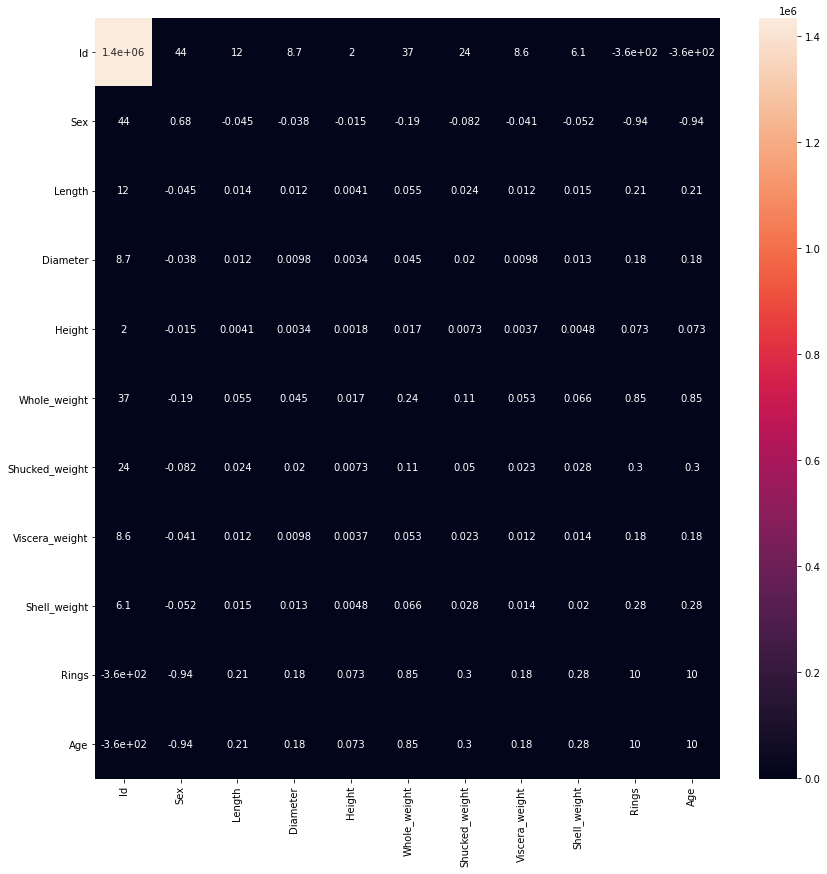

In [37]:
plt.figure(figsize=(14,14))
sns.heatmap(df_train.cov(), annot = True)

**Checking the correlation between the variables**

In [38]:
df_train.corr()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
Id,1.000000,0.044050,0.086245,0.073384,0.039486,0.063036,0.089253,0.064792,0.036367,-0.093840,-0.093840
Sex,0.044050,1.000000,-0.452393,-0.460103,-0.413996,-0.462026,-0.440873,-0.454288,-0.446839,-0.354080,-0.354080
Length,0.086245,-0.452393,1.000000,0.986626,0.809545,0.925283,0.898074,0.901923,0.896668,0.551926,0.551926
Diameter,0.073384,-0.460103,0.986626,1.000000,0.815144,0.924761,0.892732,0.898102,0.903953,0.569614,0.569614
Height,0.039486,-0.413996,0.809545,0.815144,1.000000,0.802585,0.761996,0.780910,0.799362,0.533590,0.533590
Whole_weight,0.063036,-0.462026,0.925283,0.924761,0.802585,1.000000,0.969501,0.965920,0.953238,0.535350,0.535350
Shucked_weight,0.089253,-0.440873,0.898074,0.892732,0.761996,0.969501,1.000000,0.932480,0.879739,0.414353,0.414353
Viscera_weight,0.064792,-0.454288,0.901923,0.898102,0.780910,0.965920,0.932480,1.000000,0.904726,0.496502,0.496502
Shell_weight,0.036367,-0.446839,0.896668,0.903953,0.799362,0.953238,0.879739,0.904726,1.000000,0.625154,0.625154
Rings,-0.093840,-0.354080,0.551926,0.569614,0.533590,0.535350,0.414353,0.496502,0.625154,1.000000,1.000000


##### Correlation on the other hand measures both the strength and direction of the linear relationship between two variables.
**Correlation can vary between -1 and +1**

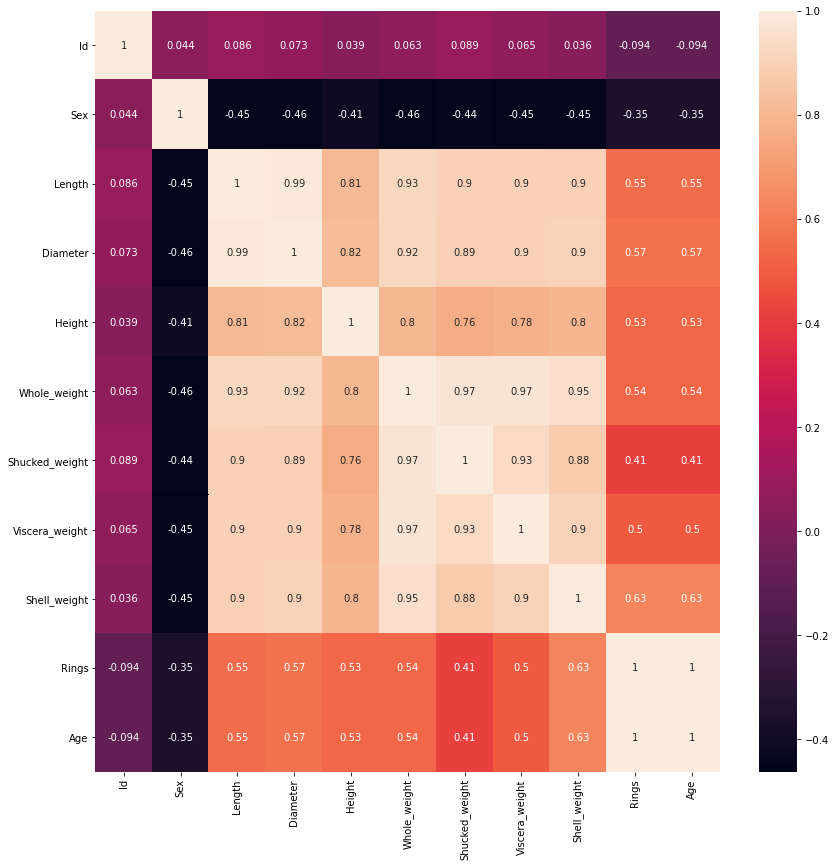

In [39]:
plt.figure(figsize=(14,14))
sns.heatmap(df_train.corr(), annot = True)

# Linear Regression

Linear regression is a basic and commonly used type of predictive analysis. The overall idea of regression is to examine two things:

- Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
- Which variables in particular are significant predictors of the outcome variable, and in what way they do impact the outcome variable?

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :
**y=β0+β1x**

What does each term represent?

- y is the response 
- x is the feature
- β0 is the intercept
- β1 is the coefficient for x

In [40]:
df_train.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,3141,2,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,6.5
1,3521,2,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,4.5
2,883,0,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,16.5
3,3627,0,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,11.5
4,2106,0,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,15.5


In [41]:
df_train.columns

Index(['Id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings', 'Age'],
      dtype='object')

### Preparing X and y using pandas

In [42]:
feature_cols = ['Id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings', 'Age']                 
X = df_train[feature_cols]

In [45]:
X=df_train[feature_cols]
X.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,3141,2,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,6.5
1,3521,2,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,4.5
2,883,0,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,16.5
3,3627,0,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,11.5
4,2106,0,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,15.5


In [46]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(3341, 11)


In [47]:
y = df_train['Rings']

In [48]:
y.head()

0     5
1     3
2    15
3    10
4    14
Name: Rings, dtype: int64

In [49]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(3341,)


#### Splitting X and y into training and test datasets.

In [61]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)


In [62]:
pd.DataFrame.from_records

<bound method DataFrame.from_records of <class 'pandas.core.frame.DataFrame'>>

In [63]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(X_train, y_train)

In [64]:
accuracy = model.score(X_train, y_train)
accuracy

1.0

In [65]:
pred = model.predict(X_test)
pred

array([ 7.,  7., 11., 11., 12., 18., 10.,  8.,  7., 10., 12., 11., 13.,
        9.,  8., 10.,  8.,  9., 14.,  9., 10.,  8., 10., 11., 12., 14.,
        7.,  6.,  7.,  8., 12.,  9., 12.,  6., 11.,  9., 11., 10., 13.,
       12.,  9., 10.,  7., 12.,  9.,  8., 16.,  8.,  5.,  9.,  6., 11.,
       11., 14.,  8., 12.,  4., 13., 11.,  8., 10., 10.,  9.,  9., 11.,
       11.,  7.,  6., 11.,  8., 11.,  8.,  6.,  9., 10., 11., 11., 12.,
        9.,  6., 10., 17.,  8.,  8., 11.,  7., 10.,  7.,  9.,  6., 12.,
       10.,  7., 11., 11.,  8., 13.,  3., 11.,  6.,  8.,  5.,  9., 14.,
       11., 11.,  7.,  8., 10., 10., 15., 14., 12., 12.,  9., 15.,  8.,
        8.,  8.,  5.,  8.,  9.,  8.,  7.,  4.,  7.,  7., 10., 10., 14.,
        8., 10., 15.,  9.,  9., 13.,  9.,  9., 14., 16., 12.,  7.,  9.,
       11.,  8., 15.,  7., 12.,  4.,  6.,  9.,  8.,  6., 11., 16., 10.,
        9., 15., 12., 12., 10., 11.,  9., 10.,  6., 10., 13.,  9., 10.,
       10.,  9.,  7., 11.,  7., 16.,  7., 11.,  9., 10.,  9.,  6

In [66]:
y_test.head(10)

2709     7
2748     7
2436    11
92      11
569     12
465     18
1757    10
3172     8
1256     7
1138    10
Name: Rings, dtype: int64

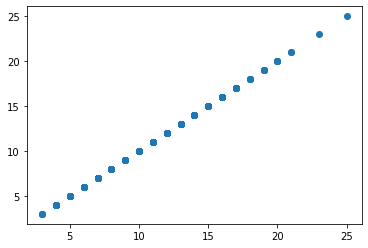

In [67]:
import matplotlib.pyplot as plt
plt.scatter(y_test, pred)

In [68]:
predictions =model.predict(X_test)
predictions

array([ 7.,  7., 11., 11., 12., 18., 10.,  8.,  7., 10., 12., 11., 13.,
        9.,  8., 10.,  8.,  9., 14.,  9., 10.,  8., 10., 11., 12., 14.,
        7.,  6.,  7.,  8., 12.,  9., 12.,  6., 11.,  9., 11., 10., 13.,
       12.,  9., 10.,  7., 12.,  9.,  8., 16.,  8.,  5.,  9.,  6., 11.,
       11., 14.,  8., 12.,  4., 13., 11.,  8., 10., 10.,  9.,  9., 11.,
       11.,  7.,  6., 11.,  8., 11.,  8.,  6.,  9., 10., 11., 11., 12.,
        9.,  6., 10., 17.,  8.,  8., 11.,  7., 10.,  7.,  9.,  6., 12.,
       10.,  7., 11., 11.,  8., 13.,  3., 11.,  6.,  8.,  5.,  9., 14.,
       11., 11.,  7.,  8., 10., 10., 15., 14., 12., 12.,  9., 15.,  8.,
        8.,  8.,  5.,  8.,  9.,  8.,  7.,  4.,  7.,  7., 10., 10., 14.,
        8., 10., 15.,  9.,  9., 13.,  9.,  9., 14., 16., 12.,  7.,  9.,
       11.,  8., 15.,  7., 12.,  4.,  6.,  9.,  8.,  6., 11., 16., 10.,
        9., 15., 12., 12., 10., 11.,  9., 10.,  6., 10., 13.,  9., 10.,
       10.,  9.,  7., 11.,  7., 16.,  7., 11.,  9., 10.,  9.,  6

In [70]:
model.intercept_

-0.7499999999999822

In [71]:
model.coef_

array([-1.53426661e-18,  3.33066907e-16, -7.49747486e-15,  3.09301196e-15,
        1.08563332e-14, -1.78329573e-15, -9.43689571e-16,  2.78076173e-15,
        5.37243861e-15,  5.00000000e-01,  5.00000000e-01])

In [72]:
feature_cols.insert(0,'Intercept')
feature_cols

['Intercept',
 'Id',
 'Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight',
 'Rings',
 'Age']

In [73]:
coef = model.coef_.tolist()
coef

[-1.5342666073137014e-18,
 3.3306690738754696e-16,
 -7.49747486317176e-15,
 3.093011957666647e-15,
 1.0856333193531853e-14,
 -1.7832957333041577e-15,
 -9.43689570931383e-16,
 2.7807617319908218e-15,
 5.3724386051001716e-15,
 0.49999999999999933,
 0.4999999999999993]

In [74]:
coef.insert(0, model.intercept_)
coef

[-0.7499999999999822,
 -1.5342666073137014e-18,
 3.3306690738754696e-16,
 -7.49747486317176e-15,
 3.093011957666647e-15,
 1.0856333193531853e-14,
 -1.7832957333041577e-15,
 -9.43689570931383e-16,
 2.7807617319908218e-15,
 5.3724386051001716e-15,
 0.49999999999999933,
 0.4999999999999993]

In [75]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.7499999999999822
Id -1.5342666073137014e-18
Sex 3.3306690738754696e-16
Length -7.49747486317176e-15
Diameter 3.093011957666647e-15
Height 1.0856333193531853e-14
Whole_weight -1.7832957333041577e-15
Shucked_weight -9.43689570931383e-16
Viscera_weight 2.7807617319908218e-15
Shell_weight 5.3724386051001716e-15
Rings 0.49999999999999933
Age 0.4999999999999993


In [76]:
y_pred_train = model.predict(X_train)

In [77]:
y_pred_test = model.predict(X_test)

In [78]:
y_pred_train

array([ 5., 16., 17., ..., 10., 20., 19.])

In [79]:
y_pred_test

array([ 7.,  7., 11., 11., 12., 18., 10.,  8.,  7., 10., 12., 11., 13.,
        9.,  8., 10.,  8.,  9., 14.,  9., 10.,  8., 10., 11., 12., 14.,
        7.,  6.,  7.,  8., 12.,  9., 12.,  6., 11.,  9., 11., 10., 13.,
       12.,  9., 10.,  7., 12.,  9.,  8., 16.,  8.,  5.,  9.,  6., 11.,
       11., 14.,  8., 12.,  4., 13., 11.,  8., 10., 10.,  9.,  9., 11.,
       11.,  7.,  6., 11.,  8., 11.,  8.,  6.,  9., 10., 11., 11., 12.,
        9.,  6., 10., 17.,  8.,  8., 11.,  7., 10.,  7.,  9.,  6., 12.,
       10.,  7., 11., 11.,  8., 13.,  3., 11.,  6.,  8.,  5.,  9., 14.,
       11., 11.,  7.,  8., 10., 10., 15., 14., 12., 12.,  9., 15.,  8.,
        8.,  8.,  5.,  8.,  9.,  8.,  7.,  4.,  7.,  7., 10., 10., 14.,
        8., 10., 15.,  9.,  9., 13.,  9.,  9., 14., 16., 12.,  7.,  9.,
       11.,  8., 15.,  7., 12.,  4.,  6.,  9.,  8.,  6., 11., 16., 10.,
        9., 15., 12., 12., 10., 11.,  9., 10.,  6., 10., 13.,  9., 10.,
       10.,  9.,  7., 11.,  7., 16.,  7., 11.,  9., 10.,  9.,  6

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [83]:
#finding RMSE values
from sklearn import metrics
RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
print('the Root Mean Squared Error for Train data is  :',RMSE_train)

the Root Mean Squared Error for Train data is  : 5.149573428256504e-15


In [84]:
from sklearn import metrics
RMSE_test=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
print('the Root Mean Squared Error for Test data is  :',RMSE_test)

the Root Mean Squared Error for Test data is  : 4.7945144731869735e-15


In [85]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train, y_pred_train)
print('The R-square value for Train dataset is  :', r2_train)

The R-square value for Train dataset is  : 1.0


In [86]:
from sklearn.metrics import r2_score
r2_test=r2_score(y_test, y_pred_test)
print('The R-square value for Test dataset is  :', r2_test)

The R-square value for Test dataset is  : 1.0


### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(criterion='mse')
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [89]:
y_train_pred_dt=model1.predict(X_train)
y_test_pred_dt=model1.predict(X_test)

In [90]:
from sklearn.tree import plot_tree

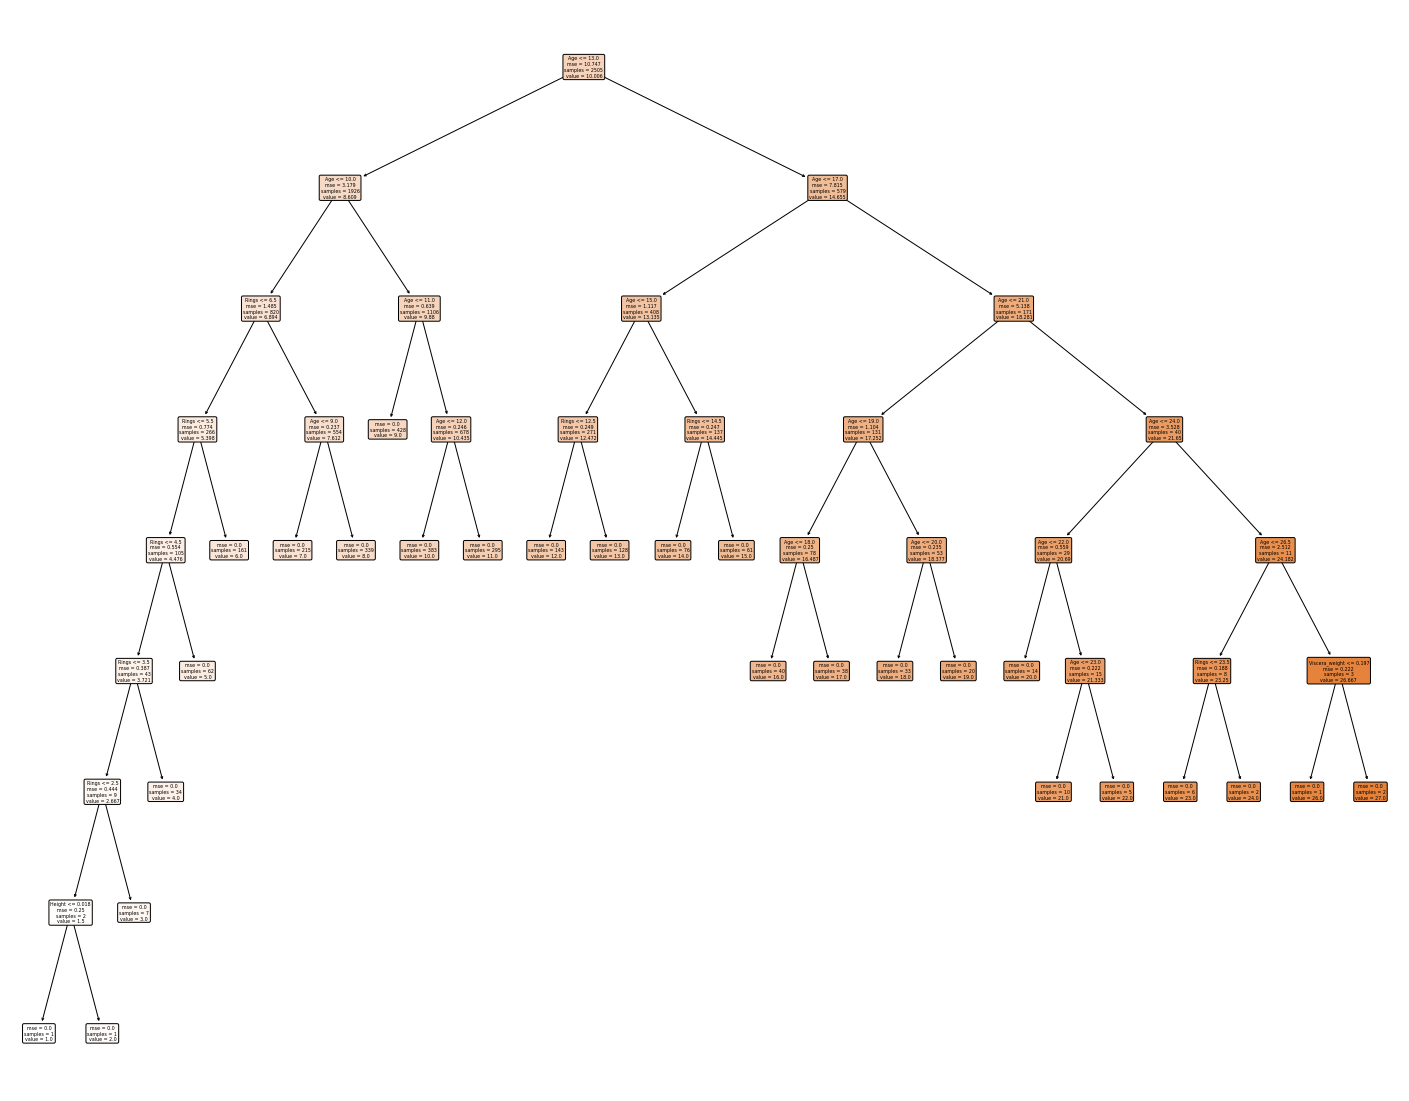

In [91]:
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(model1, feature_names=X.columns, filled=True, rounded=True)

Text(0, 0.5, 'Predicted')

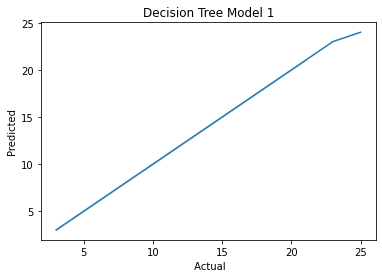

In [92]:
sns.lineplot(x=y_test, y=y_test_pred_dt)
plt.title('Decision Tree Model 1')
plt.xlabel(' Actual')
plt.ylabel('Predicted')

In [93]:
#finding RMSE values
from sklearn import metrics
RMSE_train_dt=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred_dt))
print('The RMSE Value of Train Dataset for Simple Decision Tree Model is  :',RMSE_train_dt)

The RMSE Value of Train Dataset for Simple Decision Tree Model is  : 0.0


In [94]:
#finding RMSE values
from sklearn import metrics
RMSE_test_dt=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_dt))
print('The RMSE Value of Test Dataset for Simple Decision Tree Model is  :',RMSE_test_dt)

The RMSE Value of Test Dataset for Simple Decision Tree Model is  : 0.03458572319330373


In [95]:
from sklearn.metrics import r2_score
r2_dt_train=r2_score(y_train, y_train_pred_dt)
print('The R-square value for Train Data of simple Decision Tree Model is :', r2_dt_train)

The R-square value for Train Data of simple Decision Tree Model is : 1.0


In [96]:
from sklearn.metrics import r2_score
r2_dt_test=r2_score(y_test, y_test_pred_dt)
print('The R-square value for Test Data of simple Decision Tree Model is :', r2_dt_test)

The R-square value for Test Data of simple Decision Tree Model is : 0.999864455145354


In [98]:
def Adjusted_r2(r_square,N): 
    return(1-(((1-r_square)*(N-1))/(N-6)))

In [99]:
adj_r2_train=Adjusted_r2(r2_dt_train,len(X_train))
print('The Adjusted R-square of Decision Tree first model Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(r2_dt_test,len(X_test))
print('The Adjusted R-square of Decision Tree first model Test Dataset is :', adj_r2_test)

The Adjusted R-square of Decision Tree first model Train Dataset is : 1.0
The Adjusted R-square of Decision Tree first model Test Dataset is : 0.9998636386100851


In [101]:
output = pd.DataFrame({'Id': df_test.index,'Rings': predictions})
output.to_csv('ABALONE AGE PREDICTION.csv', index=False, header=False)